# Learning to fly a glider
AE598 project

# Introduction

# Simulator

# Results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import random
import abdulgym 
from SARSA import SARSAsimagent

epsilon= 0.1
alpha= 0.1
gamma= 1.0
ep_len= 10
ep_num= 10
meta=[epsilon,alpha,gamma,ep_len, ep_num]

In [2]:
env = abdulgym.make('Gliderbot-v0') 
env.reset()
#QS, rewardS, a, s, r_s, big_state = SARSAsimagent(meta,env)
big_state =[]
x , y, z, mu, gamma, mu = [],[],[],[],[],[]
action_list = []

for i in range(100):
    action = np.random.randint(0,3)
    state , reward = env.step(action)
    #big_state.append(state)
    x.append(state.pos.x)
    y.append(state.pos.y)
    z.append(state.pos.z)
    mu.append(state.pos.mu)
    gamma.append(state.pos.gamma)
    action_list.append(action)

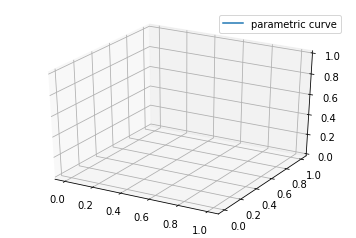

In [3]:
x=[]
y=[]
z=[]

for v in big_state:
    x.append(v.pos.x)
    y.append(v.pos.y)
    z.append(v.pos.z)
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

In [ ]:
soutput=25*['']
for i in range(len(gaS)):
    if gaS[i]==0:
        soutput[i]='>'
    elif gaS[i]==1:
        soutput[i]='<'
    elif gaS[i]==2:
        soutput[i]='^'
    else:
        soutput[i]='v'
    
print('  SARSA')
print('',*soutput[20:25],'\n',*soutput[15:20],'\n',*soutput[10:15],'\n',*soutput[5:10],'\n',*soutput[0:5],'\n')        
# 0 right 1 left 2 up 3 down


In [3]:
import abdulgym
import numpy as np
env = abdulgym.make('Gliderbot-v0') 
env.reset()
from collections import namedtuple
import matplotlib.pyplot as plt
tupler = namedtuple("a", ['x','y'])
t= 1
delta = 1 # how many data points per meter of each direction
chunk = 100
dim = env.max_x*delta // chunk
v = np.zeros([t, dim, dim])
heading = 0

In [4]:
iter = 0
import time
t0 = time.time()

for i_t in range(t):
    print(i_t,time.time()-t0)    
    for i_x in range(dim):
        for i_y in range(dim):
            iter += 1
            ti = i_t*2
            x =  i_x * chunk 
            y =  i_y * chunk
            print(x,y,t, iter)
            pos = tupler(x , y)
            
            v[i_t, i_x, i_y] = np.mean(env.get_wind(pos, heading, ti))
            


0 0.0009946823120117188
0 0 1 1
0 10 1 2
0 20 1 3
0 30 1 4
0 40 1 5
0 50 1 6
0 60 1 7
0 70 1 8
0 80 1 9
0 90 1 10
0 100 1 11
0 110 1 12
0 120 1 13
0 130 1 14
0 140 1 15
0 150 1 16
0 160 1 17
0 170 1 18
0 180 1 19
0 190 1 20
0 200 1 21
0 210 1 22
0 220 1 23
0 230 1 24
0 240 1 25
0 250 1 26
0 260 1 27
0 270 1 28
0 280 1 29
0 290 1 30
0 300 1 31
0 310 1 32
0 320 1 33
0 330 1 34
0 340 1 35
0 350 1 36
0 360 1 37
0 370 1 38
0 380 1 39
0 390 1 40
0 400 1 41
0 410 1 42
0 420 1 43
0 430 1 44
0 440 1 45
0 450 1 46
0 460 1 47
0 470 1 48
0 480 1 49
0 490 1 50
0 500 1 51
0 510 1 52
0 520 1 53
0 530 1 54
0 540 1 55
0 550 1 56
0 560 1 57
0 570 1 58
0 580 1 59
0 590 1 60
0 600 1 61
0 610 1 62
0 620 1 63
0 630 1 64
0 640 1 65
0 650 1 66
0 660 1 67
0 670 1 68
0 680 1 69
0 690 1 70
0 700 1 71
0 710 1 72
0 720 1 73
0 730 1 74
0 740 1 75
0 750 1 76
0 760 1 77
0 770 1 78
0 780 1 79
0 790 1 80
0 800 1 81
0 810 1 82
0 820 1 83
0 830 1 84
0 840 1 85
0 850 1 86
0 860 1 87
0 870 1 88
0 880 1 89
0 890 1 90
0 900 

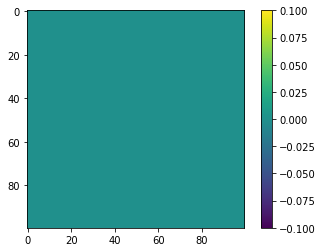

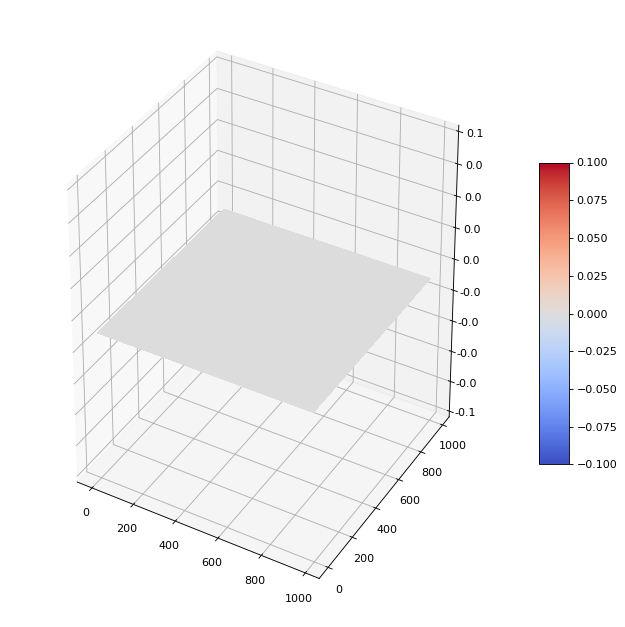

In [4]:
#     env.step() <-- return digit_state, self.state , reward, [w_left, w_right]
plt.imshow(v[0])
plt.colorbar()
plt.show()
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import matplotlib.animation as animation


fig = plt.figure()
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, 1000, 10)
Y = np.arange(0, 1000, 10)
X, Y = np.meshgrid(X, Y)
Z = v[0]

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

# Wins
- Most cleanly written code so far (personal best) 
- Learned OOP + Python
- Learned RL 
- 

# Moving forward